<a href="https://colab.research.google.com/github/Iswaan/Cataract-Classification/blob/main/Image_Clarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the path to the 'Dataset Ganglia' folder
dataset_ganglia_path = '/content/drive/MyDrive/Dataset Ganglia'

# Define the name of the folder you are looking for
folder_name = 'processed_images'

# Construct the full path to the 'processed_images' folder
folder_path = os.path.join(dataset_ganglia_path, folder_name)

In [ ]:
# Check if the 'processed_images' folder exists in the 'Dataset Ganglia' directory
if os.path.exists(folder_path):
    print(f"The path to the 'processed_images' folder is: {folder_path}")
else:
    print(f"The folder '{folder_name}' does not exist in the specified location.")

The path to the 'processed_images' folder is: /content/drive/MyDrive/Dataset Ganglia/processed_images


In [ ]:
## Found Path

In [ ]:
## /content/drive/MyDrive/Dataset Ganglia/processed_images

In [ ]:
import os
import shutil
import random
from PIL import Image, ImageOps

# ===== CONFIG =====
dataset1_path = "/content/drive/MyDrive/Dataset Ganglia/eye-dataset"
dataset2_path = "/content/drive/MyDrive/Dataset Ganglia/processed_images"
output_path = "/content/final_dataset"
target_size = (224, 224)  # Resize to this

# ===== COLLECT IMAGES =====
cataract_images = []
non_cataract_images = []

# Dataset 1 — Extract from label files
for split in ["train", "val", "test"]:
    label_dir = os.path.join(dataset1_path, split, "labels")
    image_dir = os.path.join(dataset1_path, split, "images")
    if not os.path.exists(label_dir): continue
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as f:
            label_line = f.readline().strip()
            label_class = int(label_line.split()[0])
            img_file = label_file.replace(".txt", ".jpg")
            img_path = os.path.join(image_dir, img_file)
            if os.path.exists(img_path):
                if label_class == 0:
                    cataract_images.append(img_path)
                elif label_class == 1:
                    non_cataract_images.append(img_path)

# Dataset 2 — Extra images from folders
for cls in ["cataract", "non-cataract"]:
    class_dir = os.path.join(dataset2_path, cls)
    if not os.path.exists(class_dir): continue
    for file in os.listdir(class_dir):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            path = os.path.join(class_dir, file)
            if cls == "cataract":
                cataract_images.append(path)
            else:
                non_cataract_images.append(path)

# ===== BALANCE DATASET =====
random.shuffle(cataract_images)
random.shuffle(non_cataract_images)
N = min(len(cataract_images), len(non_cataract_images))

cataract_images = cataract_images[:N]
non_cataract_images = non_cataract_images[:N]

# ===== CREATE FINAL DATASET STRUCTURE =====
def process_and_save(images, label, start_index=1):
    splits = ["train", "val", "test"]
    ratios = [0.7, 0.15, 0.15]
    counts = [int(N * r) for r in ratios]

    index = 0
    for split, count in zip(splits, counts):
        split_dir = os.path.join(output_path, split, label)
        os.makedirs(split_dir, exist_ok=True)
        for _ in range(count):
            if index >= len(images): break
            img_path = images[index]
            try:
                img = Image.open(img_path).convert("RGB")
                img_resized = ImageOps.fit(img, target_size, method=Image.Resampling.LANCZOS)
                filename = f"{label}_{start_index + index:05d}.jpg"
                img_resized.save(os.path.join(split_dir, filename))
            except Exception as e:
                print(f"Error with {img_path}: {e}")
            index += 1

# ===== PROCESS AND SAVE =====
process_and_save(cataract_images, "cataract", start_index=1)
process_and_save(non_cataract_images, "non-cataract", start_index=1)

print("✅ Dataset preparation complete!")


✅ Dataset preparation complete!


In [ ]:
import shutil

shutil.make_archive('/content/final_dataset', 'zip', '/content/final_dataset')


'/content/final_dataset.zip'

In [ ]:
from google.colab import files
files.download('/content/final_dataset.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Went wrong

In [ ]:
import os
import shutil
from PIL import Image

# === CONFIG ===
source_root = "/content/drive/MyDrive/Dataset Ganglia/eye-dataset"
output_root = "/content/dataset1"
cat_dir = os.path.join(output_root, "cat")
noncat_dir = os.path.join(output_root, "noncat")

# === Make folders ===
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(noncat_dir, exist_ok=True)

# === Counters for renaming ===
cat_counter = 1
noncat_counter = 1

# === Process subfolders: test, train, val ===
subfolders = ['test', 'train', 'val']

for sub in subfolders:
    image_dir = os.path.join(source_root, sub, 'images')
    label_dir = os.path.join(source_root, sub, 'labels')

    for label_file in os.listdir(label_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(label_dir, label_file)

        # Get class (first line only)
        with open(label_path, 'r') as f:
            first_line = f.readline().strip()
            if not first_line:
                continue
            class_id = first_line.split()[0]

        # Corresponding image filename
        image_name = label_file.replace(".txt", ".jpg")
        alt_name = label_file.replace(".txt", ".png")  # fallback if jpg doesn't exist
        image_path = os.path.join(image_dir, image_name)
        if not os.path.exists(image_path):
            image_path = os.path.join(image_dir, alt_name)
            if not os.path.exists(image_path):
                print(f"Image not found for label: {label_file}")
                continue

        try:
            # Confirm image is valid
            with Image.open(image_path) as img:
                img.verify()

            # Copy and rename
            if class_id == '0':
                new_name = f"cat_{cat_counter}.jpg"
                shutil.copy(image_path, os.path.join(cat_dir, new_name))
                cat_counter += 1
            elif class_id == '1':
                new_name = f"noncat_{noncat_counter}.jpg"
                shutil.copy(image_path, os.path.join(noncat_dir, new_name))
                noncat_counter += 1
            else:
                print(f"Unknown label {class_id} in file: {label_file}")

        except Exception as e:
            print(f"Skipping {image_path}: {e}")


In [ ]:
import os

cat_images = os.listdir('/content/dataset1/cat')
noncat_images = os.listdir('/content/dataset1/noncat')

print(f"Total CATARACT images  : {len(cat_images)}")
print(f"Total NON-CATARACT images: {len(noncat_images)}")

# Show a few filenames to confirm correct naming
print("Sample CATARACT files  :", cat_images[:5])
print("Sample NON-CATARACT files:", noncat_images[:5])


Total CATARACT images  : 169
Total NON-CATARACT images: 29
Sample CATARACT files  : ['cat_58.jpg', 'cat_168.jpg', 'cat_59.jpg', 'cat_51.jpg', 'cat_66.jpg']
Sample NON-CATARACT files: ['noncat_12.jpg', 'noncat_13.jpg', 'noncat_28.jpg', 'noncat_6.jpg', 'noncat_19.jpg']


In [ ]:
import os

base_path = "/content/drive/MyDrive/Dataset Ganglia/eye-dataset"
subfolders = ["train", "test", "val"]

for sub in subfolders:
    image_folder = os.path.join(base_path, sub, "images")
    label_folder = os.path.join(base_path, sub, "labels")

    image_count = len(os.listdir(image_folder))
    label_count = len(os.listdir(label_folder))

    print(f"{sub.upper()} - Images: {image_count}, Labels: {label_count}")


TRAIN - Images: 1385, Labels: 1385
TEST - Images: 198, Labels: 198
VAL - Images: 396, Labels: 396


In [ ]:
import os
import shutil
from PIL import Image

# === Paths ===
root_dir = "/content/drive/MyDrive/Dataset Ganglia/eye-dataset"
output_dir = "/content/drive/MyDrive/Dataset Ganglia/dataset_1"
cat_dir = os.path.join(output_dir, "cat")
noncat_dir = os.path.join(output_dir, "noncat")

# === Create Clean Output Folders ===
for folder in [cat_dir, noncat_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# === Counters ===
cat_counter = 1
noncat_counter = 1

# === Dataset Folders ===
splits = ["train", "test", "val"]

for split in splits:
    img_dir = os.path.join(root_dir, split, "images")
    label_dir = os.path.join(root_dir, split, "labels")

    print(f"\n📂 Processing split: {split.upper()}")

    for fname in os.listdir(label_dir):
        if not fname.endswith(".txt"):
            continue

        label_path = os.path.join(label_dir, fname)
        image_name = os.path.splitext(fname)[0]

        # Match image
        img_path = None
        for ext in [".jpg", ".jpeg", ".png"]:
            test_path = os.path.join(img_dir, image_name + ext)
            if os.path.exists(test_path):
                img_path = test_path
                break

        if not img_path:
            print(f"❌ Image not found for label: {label_path}")
            continue

        # Read label
        with open(label_path, 'r') as f:
            line = f.readline().strip()
            if not line:
                print(f"⚠️ Empty label file: {label_path}")
                continue
            class_id = line.split()[0]

        # Process image
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((224, 224))
        except Exception as e:
            print(f"🚫 Error processing image {img_path}: {e}")
            continue

        # Save based on label
        if class_id == '0':
            new_name = f"cat_{cat_counter}.jpg"
            img.save(os.path.join(cat_dir, new_name))
            print(f"✅ [{split}] Cataract → {new_name}")
            cat_counter += 1
        elif class_id == '1':
            new_name = f"noncat_{noncat_counter}.jpg"
            img.save(os.path.join(noncat_dir, new_name))
            print(f"✅ [{split}] Non-Cataract → {new_name}")
            noncat_counter += 1
        else:
            print(f"⚠️ Unknown class ID in {label_path}: {class_id}")

print("\n🎉 Dataset restructured successfully!")
print(f"Total CATARACT images: {cat_counter - 1}")
print(f"Total NON-CATARACT images: {noncat_counter - 1}")



📂 Processing split: TRAIN
✅ [train] Cataract → cat_1.jpg
✅ [train] Cataract → cat_2.jpg
✅ [train] Cataract → cat_3.jpg
✅ [train] Cataract → cat_4.jpg
✅ [train] Cataract → cat_5.jpg
✅ [train] Cataract → cat_6.jpg
✅ [train] Cataract → cat_7.jpg
✅ [train] Cataract → cat_8.jpg
✅ [train] Cataract → cat_9.jpg
✅ [train] Cataract → cat_10.jpg
✅ [train] Cataract → cat_11.jpg
✅ [train] Cataract → cat_12.jpg
✅ [train] Cataract → cat_13.jpg
✅ [train] Cataract → cat_14.jpg
✅ [train] Cataract → cat_15.jpg
✅ [train] Cataract → cat_16.jpg
✅ [train] Cataract → cat_17.jpg
✅ [train] Cataract → cat_18.jpg
✅ [train] Cataract → cat_19.jpg
✅ [train] Cataract → cat_20.jpg
✅ [train] Cataract → cat_21.jpg
✅ [train] Cataract → cat_22.jpg
✅ [train] Cataract → cat_23.jpg
✅ [train] Cataract → cat_24.jpg
✅ [train] Cataract → cat_25.jpg
✅ [train] Cataract → cat_26.jpg
✅ [train] Cataract → cat_27.jpg
✅ [train] Cataract → cat_28.jpg
✅ [train] Cataract → cat_29.jpg
✅ [train] Cataract → cat_30.jpg
✅ [train] Cataract → c

In [ ]:
import shutil

shutil.make_archive('/content/drive/MyDrive/Dataset Ganglia/dataset_1', 'zip', '/content/drive/MyDrive/Dataset Ganglia/dataset_1')


'/content/drive/MyDrive/Dataset Ganglia/dataset_1.zip'

In [ ]:
!cp "/content/drive/MyDrive/Dataset Ganglia/dataset_1.zip" /content/
from google.colab import files
files.download("/content/dataset_1.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import shutil
from PIL import Image

# === Paths ===
source_dir = "/content/drive/MyDrive/Dataset Ganglia/processed_images"
output_dir = "/content/drive/MyDrive/Dataset Ganglia/dataset_1"
cat_dir = os.path.join(output_dir, "cat")
noncat_dir = os.path.join(output_dir, "noncat")

# === Ensure folders exist ===
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(noncat_dir, exist_ok=True)

# === Continue numbering from where dataset_1 left off ===
cat_counter = 1716
noncat_counter = 265

# === Folders to loop over ===
splits = ["train", "test"]

for split in splits:
    for class_name in ["cataract", "normal"]:
        class_dir = os.path.join(source_dir, split, class_name)
        print(f"\n📁 Processing {split.upper()} / {class_name.upper()}")

        for fname in os.listdir(class_dir):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            img_path = os.path.join(class_dir, fname)

            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
            except Exception as e:
                print(f"🚫 Error processing {img_path}: {e}")
                continue

            # Save in existing dataset_1
            if class_name == "cataract":
                new_name = f"cat_{cat_counter}.jpg"
                img.save(os.path.join(cat_dir, new_name))
                print(f"✅ [{split}] Cataract → {new_name}")
                cat_counter += 1
            elif class_name == "normal":
                new_name = f"noncat_{noncat_counter}.jpg"
                img.save(os.path.join(noncat_dir, new_name))
                print(f"✅ [{split}] Non-Cataract → {new_name}")
                noncat_counter += 1

print("\n🎉 All Dataset 2 images added to dataset_1 successfully!")
print(f"Updated total CATARACT images: {cat_counter - 1}")
print(f"Updated total NON-CATARACT images: {noncat_counter - 1}")



📁 Processing TRAIN / CATARACT
✅ [train] Cataract → cat_1716.jpg
✅ [train] Cataract → cat_1717.jpg
✅ [train] Cataract → cat_1718.jpg
✅ [train] Cataract → cat_1719.jpg
✅ [train] Cataract → cat_1720.jpg
✅ [train] Cataract → cat_1721.jpg
✅ [train] Cataract → cat_1722.jpg
✅ [train] Cataract → cat_1723.jpg
✅ [train] Cataract → cat_1724.jpg
✅ [train] Cataract → cat_1725.jpg
✅ [train] Cataract → cat_1726.jpg
✅ [train] Cataract → cat_1727.jpg
✅ [train] Cataract → cat_1728.jpg
✅ [train] Cataract → cat_1729.jpg
✅ [train] Cataract → cat_1730.jpg
✅ [train] Cataract → cat_1731.jpg
✅ [train] Cataract → cat_1732.jpg
✅ [train] Cataract → cat_1733.jpg
✅ [train] Cataract → cat_1734.jpg
✅ [train] Cataract → cat_1735.jpg
✅ [train] Cataract → cat_1736.jpg
✅ [train] Cataract → cat_1737.jpg
✅ [train] Cataract → cat_1738.jpg
✅ [train] Cataract → cat_1739.jpg
✅ [train] Cataract → cat_1740.jpg
✅ [train] Cataract → cat_1741.jpg
✅ [train] Cataract → cat_1742.jpg
✅ [train] Cataract → cat_1743.jpg
✅ [train] Catarac

In [ ]:
## DATASET 2 MISSING , RE TRY

In [ ]:
import os
import shutil
from PIL import Image

# === Paths ===
root_dir = "/content/drive/MyDrive/Dataset Ganglia/eye-dataset"
output_dir = "/content/drive/MyDrive/Dataset Ganglia/dataset_f"
cat_dir = os.path.join(output_dir, "cat")
noncat_dir = os.path.join(output_dir, "noncat")

# === Create Clean Output Folders ===
for folder in [cat_dir, noncat_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# === Counters ===
cat_counter = 1
noncat_counter = 1

# === Dataset Folders ===
splits = ["train", "test", "val"]

for split in splits:
    img_dir = os.path.join(root_dir, split, "images")
    label_dir = os.path.join(root_dir, split, "labels")

    print(f"\n📂 Processing split: {split.upper()}")

    for fname in os.listdir(label_dir):
        if not fname.endswith(".txt"):
            continue

        label_path = os.path.join(label_dir, fname)
        image_name = os.path.splitext(fname)[0]

        # Match image
        img_path = None
        for ext in [".jpg", ".jpeg", ".png"]:
            test_path = os.path.join(img_dir, image_name + ext)
            if os.path.exists(test_path):
                img_path = test_path
                break

        if not img_path:
            print(f"❌ Image not found for label: {label_path}")
            continue

        # Read label
        with open(label_path, 'r') as f:
            line = f.readline().strip()
            if not line:
                print(f"⚠️ Empty label file: {label_path}")
                continue
            class_id = line.split()[0]

        # Process image
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((224, 224))
        except Exception as e:
            print(f"🚫 Error processing image {img_path}: {e}")
            continue

        # Save based on label
        if class_id == '0':
            new_name = f"cat_{cat_counter}.jpg"
            img.save(os.path.join(cat_dir, new_name))
            print(f"✅ [{split}] Cataract → {new_name}")
            cat_counter += 1
        elif class_id == '1':
            new_name = f"noncat_{noncat_counter}.jpg"
            img.save(os.path.join(noncat_dir, new_name))
            print(f"✅ [{split}] Non-Cataract → {new_name}")
            noncat_counter += 1
        else:
            print(f"⚠️ Unknown class ID in {label_path}: {class_id}")

print("\n🎉 Dataset restructured successfully!")
print(f"Total CATARACT images: {cat_counter - 1}")
print(f"Total NON-CATARACT images: {noncat_counter - 1}")



📂 Processing split: TRAIN
✅ [train] Cataract → cat_1.jpg
✅ [train] Cataract → cat_2.jpg
✅ [train] Cataract → cat_3.jpg
✅ [train] Cataract → cat_4.jpg
✅ [train] Cataract → cat_5.jpg
✅ [train] Cataract → cat_6.jpg
✅ [train] Cataract → cat_7.jpg
✅ [train] Cataract → cat_8.jpg
✅ [train] Cataract → cat_9.jpg
✅ [train] Cataract → cat_10.jpg
✅ [train] Cataract → cat_11.jpg
✅ [train] Cataract → cat_12.jpg
✅ [train] Cataract → cat_13.jpg
✅ [train] Cataract → cat_14.jpg
✅ [train] Cataract → cat_15.jpg
✅ [train] Cataract → cat_16.jpg
✅ [train] Cataract → cat_17.jpg
✅ [train] Cataract → cat_18.jpg
✅ [train] Cataract → cat_19.jpg
✅ [train] Cataract → cat_20.jpg
✅ [train] Cataract → cat_21.jpg
✅ [train] Cataract → cat_22.jpg
✅ [train] Cataract → cat_23.jpg
✅ [train] Cataract → cat_24.jpg
✅ [train] Cataract → cat_25.jpg
✅ [train] Cataract → cat_26.jpg
✅ [train] Cataract → cat_27.jpg
✅ [train] Cataract → cat_28.jpg
✅ [train] Cataract → cat_29.jpg
✅ [train] Cataract → cat_30.jpg
✅ [train] Cataract → c

In [ ]:
import os
from PIL import Image

# === Source Paths ===
dataset2_root = "/content/drive/MyDrive/Dataset Ganglia/processed_images"
splits = ["train", "test"]

# === Destination Paths ===
output_root = "/content/drive/MyDrive/Dataset Ganglia/dataset_f"
cat_dir = os.path.join(output_root, "cat")
noncat_dir = os.path.join(output_root, "noncat")

# === Start Counters (from last image in dataset_f) ===
cat_counter = 1716
noncat_counter = 265

# === Process Dataset 2 ===
for split in splits:
    for label in ["cataract", "normal"]:
        label_dir = os.path.join(dataset2_root, split, label)
        if not os.path.exists(label_dir):
            print(f"❌ Missing: {label_dir}")
            continue

        print(f"\n📂 Processing: {split.upper()} → {label}")

        for fname in os.listdir(label_dir):
            if not fname.lower().endswith((".jpg", ".jpeg", ".png")):
                continue

            img_path = os.path.join(label_dir, fname)

            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
            except Exception as e:
                print(f"🚫 Failed to process {img_path}: {e}")
                continue

            if label == "cataract":
                new_name = f"cat_{cat_counter}.jpg"
                img.save(os.path.join(cat_dir, new_name))
                print(f"✅ [D2-{split}] Cataract → {new_name}")
                cat_counter += 1
            elif label == "normal":
                new_name = f"noncat_{noncat_counter}.jpg"
                img.save(os.path.join(noncat_dir, new_name))
                print(f"✅ [D2-{split}] Non-Cataract → {new_name}")
                noncat_counter += 1

print("\n🎯 All Dataset 2 images added to dataset_f successfully!")
print(f"Final CATARACT image count ends at: cat_{cat_counter - 1}.jpg")
print(f"Final NON-CATARACT image count ends at: noncat_{noncat_counter - 1}.jpg")



📂 Processing: TRAIN → cataract
✅ [D2-train] Cataract → cat_1716.jpg
✅ [D2-train] Cataract → cat_1717.jpg
✅ [D2-train] Cataract → cat_1718.jpg
✅ [D2-train] Cataract → cat_1719.jpg
✅ [D2-train] Cataract → cat_1720.jpg
✅ [D2-train] Cataract → cat_1721.jpg
✅ [D2-train] Cataract → cat_1722.jpg
✅ [D2-train] Cataract → cat_1723.jpg
✅ [D2-train] Cataract → cat_1724.jpg
✅ [D2-train] Cataract → cat_1725.jpg
✅ [D2-train] Cataract → cat_1726.jpg
✅ [D2-train] Cataract → cat_1727.jpg
✅ [D2-train] Cataract → cat_1728.jpg
✅ [D2-train] Cataract → cat_1729.jpg
✅ [D2-train] Cataract → cat_1730.jpg
✅ [D2-train] Cataract → cat_1731.jpg
✅ [D2-train] Cataract → cat_1732.jpg
✅ [D2-train] Cataract → cat_1733.jpg
✅ [D2-train] Cataract → cat_1734.jpg
✅ [D2-train] Cataract → cat_1735.jpg
✅ [D2-train] Cataract → cat_1736.jpg
✅ [D2-train] Cataract → cat_1737.jpg
✅ [D2-train] Cataract → cat_1738.jpg
✅ [D2-train] Cataract → cat_1739.jpg
✅ [D2-train] Cataract → cat_1740.jpg
✅ [D2-train] Cataract → cat_1741.jpg
✅ [D2-

In [ ]:
import os

# === Paths ===
cat_dir = "/content/drive/MyDrive/Dataset Ganglia/dataset_f/cat"
noncat_dir = "/content/drive/MyDrive/Dataset Ganglia/dataset_f/noncat"

# === Get File Lists ===
cat_files = sorted([f for f in os.listdir(cat_dir) if f.lower().endswith(".jpg")])
noncat_files = sorted([f for f in os.listdir(noncat_dir) if f.lower().endswith(".jpg")])

# === Print Stats ===
print(f"\n📊 Total Cataract Images     : {len(cat_files)}")
print(f"📊 Total Non-Cataract Images : {len(noncat_files)}")

print(f"\n🧾 Sample Cataract Files     : {cat_files[:5]} ... {cat_files[-5:]}")
print(f"🧾 Sample Non-Cataract Files : {noncat_files[:5]} ... {noncat_files[-5:]}")



📊 Total Cataract Images     : 2021
📊 Total Non-Cataract Images : 570

🧾 Sample Cataract Files     : ['cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_1000.jpg', 'cat_1001.jpg'] ... ['cat_995.jpg', 'cat_996.jpg', 'cat_997.jpg', 'cat_998.jpg', 'cat_999.jpg']
🧾 Sample Non-Cataract Files : ['noncat_1.jpg', 'noncat_10.jpg', 'noncat_100.jpg', 'noncat_101.jpg', 'noncat_102.jpg'] ... ['noncat_95.jpg', 'noncat_96.jpg', 'noncat_97.jpg', 'noncat_98.jpg', 'noncat_99.jpg']


In [ ]:
import shutil

# Path to your final dataset folder
dataset_path = "/content/drive/MyDrive/Dataset Ganglia/dataset_f"
zip_output_path = "/content/dataset_f"  # This will create /content/dataset_f.zip

# Create ZIP archive
shutil.make_archive(zip_output_path, 'zip', dataset_path)

print("✅ Zipping complete! Ready to download.")


✅ Zipping complete! Ready to download.


In [ ]:
from google.colab import files
files.download("/content/dataset_f.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import shutil

# === Source Folders ===
source_cat = "/content/drive/MyDrive/Dataset Ganglia/dataset_f/cat"
source_noncat = "/content/drive/MyDrive/Dataset Ganglia/dataset_f/noncat"

# === Destination Folders ===
target_root = "/content/drive/MyDrive/Dataset Ganglia/dataset_f1"
target_cat = os.path.join(target_root, "cat1")
target_noncat = os.path.join(target_root, "noncat1")

# === Create clean destination folders ===
for folder in [target_cat, target_noncat]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# === Copy all 570 non-cataract images ===
noncat_images = sorted(os.listdir(source_noncat), key=lambda x: int(x.split("_")[1].split(".")[0]))
for img_name in noncat_images:
    src_path = os.path.join(source_noncat, img_name)
    dst_path = os.path.join(target_noncat, img_name)
    shutil.copy(src_path, dst_path)
print(f"✅ Copied {len(noncat_images)} non-cataract images.")

# === Copy last 600 cataract images ===
cat_images = sorted(os.listdir(source_cat), key=lambda x: int(x.split("_")[1].split(".")[0]))
selected_cat_images = cat_images[-600:]
for img_name in selected_cat_images:
    src_path = os.path.join(source_cat, img_name)
    dst_path = os.path.join(target_cat, img_name)
    shutil.copy(src_path, dst_path)
print(f"✅ Copied {len(selected_cat_images)} cataract images (last 600).")

print("\n🎉 dataset_f1 prepared successfully!")


✅ Copied 570 non-cataract images.
✅ Copied 600 cataract images (last 600).

🎉 dataset_f1 prepared successfully!


In [ ]:
print("CATARACT:", len(os.listdir(target_cat)))
print("NON-CATARACT:", len(os.listdir(target_noncat)))


CATARACT: 600
NON-CATARACT: 570


In [ ]:
import shutil



'/content/dataset_f1.zip'

In [ ]:
from google.colab import files

files.download("/content/dataset_f1.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install albumentations tqdm opencv-python-headless


In [ ]:
import os
import cv2
import shutil
from tqdm import tqdm
from pathlib import Path

# Original dataset path
target_root = "/content/drive/MyDrive/Dataset Ganglia/dataset_f1"
cat_dir = os.path.join(target_root, "cat1")
noncat_dir = os.path.join(target_root, "noncat1")

# Destination root folder
blur_root = "/content/blur_analysis"

# Threshold for Laplacian blur detection
blur_thresh = 100

def is_blurry(img_path, threshold=100):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None: return False
    lap = cv2.Laplacian(img, cv2.CV_64F)
    score = lap.var()
    return score < threshold

def split_blur(input_dir, class_name):
    blurry_dir = os.path.join(blur_root, "blurry", class_name)
    non_blurry_dir = os.path.join(blur_root, "non_blurry", class_name)
    os.makedirs(blurry_dir, exist_ok=True)
    os.makedirs(non_blurry_dir, exist_ok=True)

    img_paths = list(Path(input_dir).glob("*.jpg"))
    for img_path in tqdm(img_paths, desc=f"Checking blur: {class_name}"):
        out_dir = blurry_dir if is_blurry(img_path, blur_thresh) else non_blurry_dir
        shutil.copy(str(img_path), os.path.join(out_dir, img_path.name))

# Apply to both classes
split_blur(cat_dir, "cat1")
split_blur(noncat_dir, "noncat1")


Checking blur: noncat1: 100%|██████████| 570/570 [00:06<00:00, 89.21it/s] 


In [ ]:
import shutil

src = "/content/blur_analysis"
dst = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis"

# Move folder
shutil.move(src, dst)
print(f"✅ Moved blur_analysis → {dst}")


✅ Moved blur_analysis → /content/drive/MyDrive/Dataset Ganglia/blur_analysis


In [ ]:
blur_thresh = 100  # Laplacian threshold

def is_blurry(img_path, threshold=100):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None: return False
    lap = cv2.Laplacian(img, cv2.CV_64F)
    score = lap.var()
    return score < threshold


In [ ]:
from pathlib import Path
import cv2

sample_paths = list(Path("/content/drive/MyDrive/Dataset Ganglia/dataset_f1/cat1").glob("*.jpg"))[:5]

for path in sample_paths:
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"{path.name} → ❌ Failed to load")
        continue
    lap = cv2.Laplacian(img, cv2.CV_64F)
    score = lap.var()
    print(f"{path.name} → Laplacian Variance: {score:.2f}")


cat_1422.jpg → Laplacian Variance: 5.43
cat_1423.jpg → Laplacian Variance: 100.14
cat_1424.jpg → Laplacian Variance: 134.72
cat_1425.jpg → Laplacian Variance: 21.08
cat_1426.jpg → Laplacian Variance: 15.07


In [ ]:
blur_thresh = 50

def is_blurry(img_path, threshold=blur_thresh):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None: return False
    lap = cv2.Laplacian(img, cv2.CV_64F)
    score = lap.var()
    return score < threshold


In [ ]:
import shutil

shutil.rmtree("/content/blur_analysis", ignore_errors=True)


In [ ]:
split_blur(cat_dir, "cat1")
split_blur(noncat_dir, "noncat1")


Checking blur: noncat1: 100%|██████████| 570/570 [00:06<00:00, 94.48it/s] 


In [ ]:
for root, dirs, files in os.walk("/content/blur_analysis"):
    print(f"{root} → {len(files)} files")


/content/blur_analysis → 0 files
/content/blur_analysis/non_blurry → 0 files
/content/blur_analysis/non_blurry/noncat1 → 448 files
/content/blur_analysis/non_blurry/cat1 → 394 files
/content/blur_analysis/blurry → 0 files
/content/blur_analysis/blurry/noncat1 → 122 files
/content/blur_analysis/blurry/cat1 → 206 files


In [ ]:
import os
import shutil
from pathlib import Path

# Source paths from previous step
src_root = "/content/blur_analysis"

# Destination path in Drive
dst_root = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis1"

# Mapping from original class names to new structure
class_map = {
    "cat1": "cataract",
    "noncat1": "non_cataract"
}

# Create structured folder tree
for old_class, new_class in class_map.items():
    for clarity in ["blurry", "non_blurry"]:
        src = os.path.join(src_root, clarity, old_class)
        dst = os.path.join(dst_root, new_class, clarity)
        os.makedirs(dst, exist_ok=True)

        # Copy all images
        for img_path in Path(src).glob("*.jpg"):
            shutil.copy(str(img_path), os.path.join(dst, img_path.name))

print("✅ Organized folder created at:", dst_root)


✅ Organized folder created at: /content/drive/MyDrive/Dataset Ganglia/blur_analysis1


In [ ]:
import os

base_dir = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis1"

for class_type in ["cataract", "non_cataract"]:
    for blur_type in ["blurry", "non_blurry"]:
        folder = os.path.join(base_dir, class_type, blur_type)
        count = len([f for f in os.listdir(folder) if f.endswith(".jpg")])
        print(f"{class_type}/{blur_type} → {count} images")


cataract/blurry → 206 images
cataract/non_blurry → 394 images
non_cataract/blurry → 122 images
non_cataract/non_blurry → 448 images


In [ ]:
import shutil

folder_to_zip = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis1"
shutil.make_archive("/content/blur_analysis1", 'zip', folder_to_zip)


'/content/blur_analysis1.zip'

In [ ]:
from google.colab import files
files.download("/content/blur_analysis1.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm

# Source: blurry folders
input_base = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis1"
output_base = "/content/drive/MyDrive/Dataset Ganglia/enhanced_blurry"

# Enhancement function: CLAHE + Sharpening
def enhance_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl_img = clahe.apply(img)
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharp_img = cv2.filter2D(cl_img, -1, sharpen_kernel)
    return sharp_img

# Process both cataract and non_cataract blurry images
for cls in ['cataract', 'non_cataract']:
    input_folder = os.path.join(input_base, cls, 'blurry')
    output_folder = os.path.join(output_base, cls)
    os.makedirs(output_folder, exist_ok=True)

    for img_path in tqdm(list(Path(input_folder).glob("*.jpg")), desc=f"Enhancing {cls} blurry images"):
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        enhanced = enhance_image(img)
        cv2.imwrite(os.path.join(output_folder, img_path.name), enhanced)


Enhancing non_cataract blurry images: 100%|██████████| 122/122 [00:02<00:00, 53.82it/s]


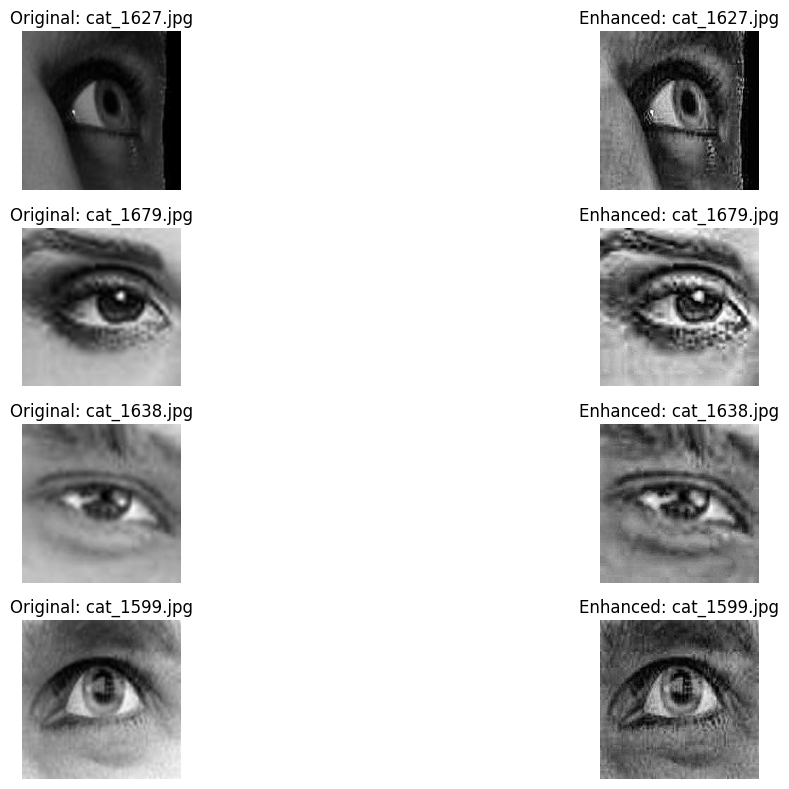

In [ ]:
import matplotlib.pyplot as plt
import random

# Paths
before_dir = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis1/cataract/blurry"
after_dir = "/content/drive/MyDrive/Dataset Ganglia/enhanced_blurry/cataract"

# Sample 4 random images
sample_imgs = random.sample(list(Path(before_dir).glob("*.jpg")), 4)

# Plot them
plt.figure(figsize=(16, 8))
for i, img_path in enumerate(sample_imgs):
    before_img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    after_img = cv2.imread(str(Path(after_dir) / img_path.name), cv2.IMREAD_GRAYSCALE)

    plt.subplot(4, 2, 2*i + 1)
    plt.imshow(before_img, cmap='gray')
    plt.title(f"Original: {img_path.name}")
    plt.axis('off')

    plt.subplot(4, 2, 2*i + 2)
    plt.imshow(after_img, cmap='gray')
    plt.title(f"Enhanced: {img_path.name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


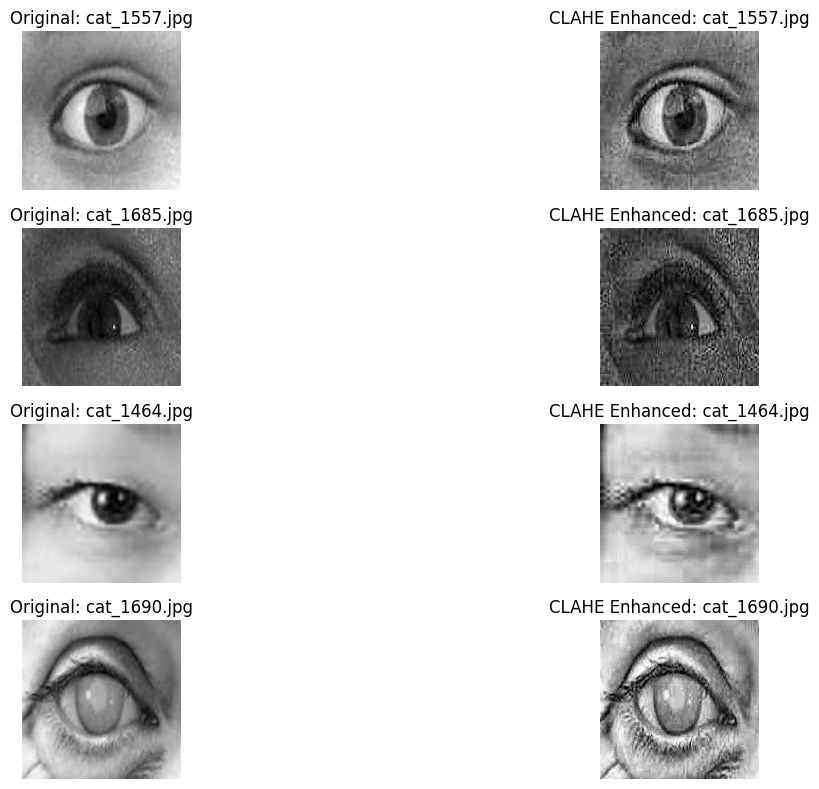

In [ ]:
import matplotlib.pyplot as plt
import random

before_dir = "/content/drive/MyDrive/Dataset Ganglia/blur_analysis1/cataract/blurry"
after_dir = "/content/drive/MyDrive/Dataset Ganglia/enhanced_blurry/cataract"
sample_imgs = random.sample(list(Path(before_dir).glob("*.jpg")), 4)

plt.figure(figsize=(16, 8))
for i, img_path in enumerate(sample_imgs):
    before_img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    after_img = cv2.imread(str(Path(after_dir) / img_path.name), cv2.IMREAD_GRAYSCALE)

    plt.subplot(4, 2, 2*i + 1)
    plt.imshow(before_img, cmap='gray')
    plt.title(f"Original: {img_path.name}")
    plt.axis('off')

    plt.subplot(4, 2, 2*i + 2)
    plt.imshow(after_img, cmap='gray')
    plt.title(f"CLAHE Enhanced: {img_path.name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


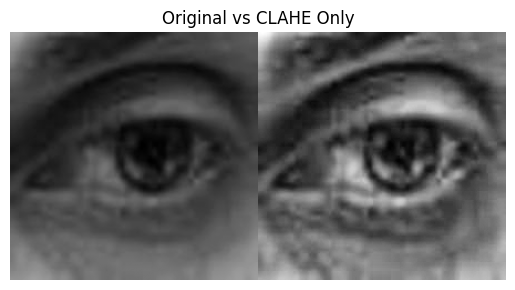

In [ ]:
def clahe_only(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(img)

enhanced1 = clahe_only(original)

# Show
plt.figure(); plt.imshow(np.hstack([original, enhanced1]), cmap='gray')
plt.title("Original vs CLAHE Only"); plt.axis('off'); plt.show()


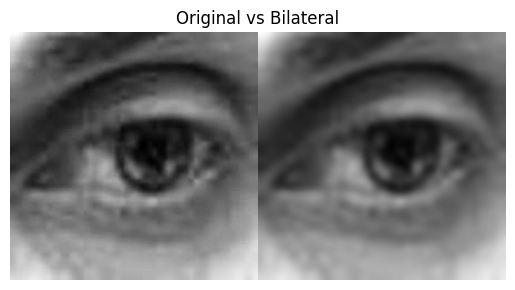

In [ ]:
def bilateral_filter(img):
    return cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

enhanced2 = bilateral_filter(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced2]), cmap='gray')
plt.title("Original vs Bilateral"); plt.axis('off'); plt.show()


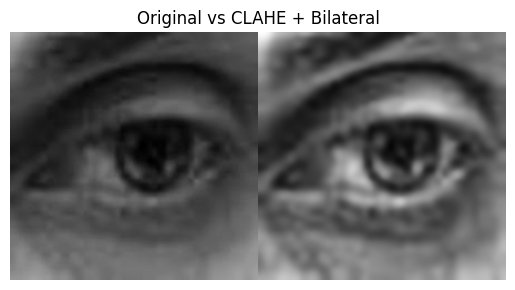

In [ ]:
def clahe_plus_bilateral(img):
    return bilateral_filter(clahe_only(img))

enhanced3 = clahe_plus_bilateral(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced3]), cmap='gray')
plt.title("Original vs CLAHE + Bilateral"); plt.axis('off'); plt.show()


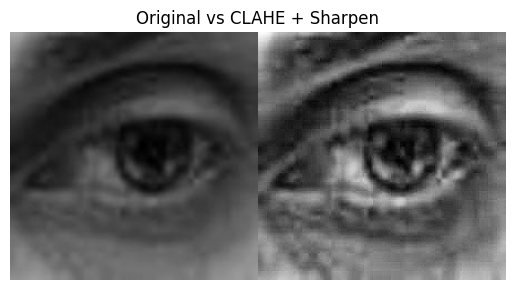

In [ ]:
def clahe_plus_sharpen(img):
    enhanced = clahe_only(img)
    kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]])
    return cv2.filter2D(enhanced, -1, kernel)

enhanced4 = clahe_plus_sharpen(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced4]), cmap='gray')
plt.title("Original vs CLAHE + Sharpen"); plt.axis('off'); plt.show()


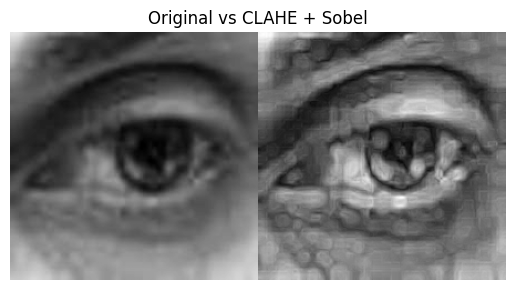

In [ ]:
def clahe_sobel(img):
    clahe_img = clahe_only(img)
    sobelx = cv2.Sobel(clahe_img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(clahe_img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    sobel = np.uint8(np.clip(sobel, 0, 255))
    return cv2.addWeighted(clahe_img, 0.7, sobel, 0.3, 0)

enhanced5 = clahe_sobel(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced5]), cmap='gray')
plt.title("Original vs CLAHE + Sobel"); plt.axis('off'); plt.show()


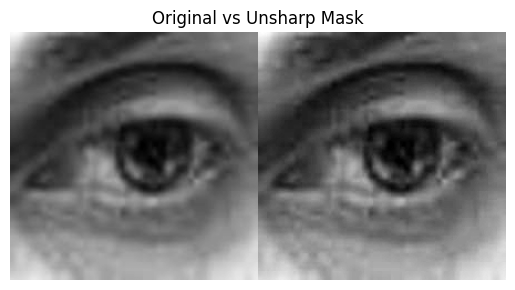

In [ ]:
def unsharp_mask(img):
    gaussian = cv2.GaussianBlur(img, (9, 9), 10.0)
    return cv2.addWeighted(img, 1.5, gaussian, -0.5, 0)

enhanced6 = unsharp_mask(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced6]), cmap='gray')
plt.title("Original vs Unsharp Mask"); plt.axis('off'); plt.show()


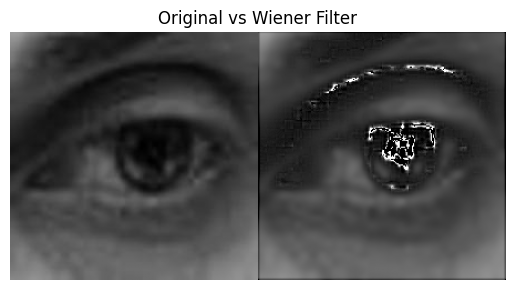

In [ ]:
from scipy.signal import wiener

def wiener_deblur(img):
    return np.uint8(np.clip(wiener(img, (5, 5)), 0, 255))

enhanced7 = wiener_deblur(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced7]), cmap='gray')
plt.title("Original vs Wiener Filter"); plt.axis('off'); plt.show()


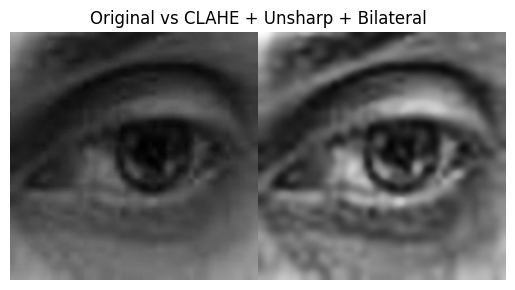

In [ ]:
def clahe_unsharp_bilateral(img):
    step1 = clahe_only(img)
    step2 = unsharp_mask(step1)
    return bilateral_filter(step2)

enhanced8 = clahe_unsharp_bilateral(original)

plt.figure(); plt.imshow(np.hstack([original, enhanced8]), cmap='gray')
plt.title("Original vs CLAHE + Unsharp + Bilateral"); plt.axis('off'); plt.show()
